In [1]:
# Importing Required Modules and Packages

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [126]:
# Reading the data from csv file
df=pd.read_csv(r'C:\Users\Mayank\Desktop\Mayank\AI Weather and Pollution Prediction Project\Main Datasets\Delhi AQI.csv')

In [127]:
df.head()

,City,Date,PM2.5,PM10,NO2,CO,SO2,O3,AQI
0,Delhi,01-01-2015,313.22,607.98,36.39,15.20,9.25,41.68,472.0
1,Delhi,02-01-2015,186.18,269.55,32.87,9.54,6.65,29.97,454.0
2,Delhi,03-01-2015,87.18,131.90,30.31,10.61,2.65,19.71,143.0
3,Delhi,04-01-2015,151.84,241.84,36.91,11.54,4.63,25.36,319.0
4,Delhi,05-01-2015,146.60,219.13,34.92,9.20,3.33,23.20,325.0


In [128]:
df.describe()

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
count,1934.000000,1915.000000,1934.000000,1934.000000,1905.000000,1931.000000,1931.000000
mean,120.033899,232.621196,50.754038,2.054881,15.882325,51.223175,265.898498
std,83.070182,122.490836,22.394635,2.577670,7.961576,26.084755,116.356715
min,10.240000,16.000000,5.000000,0.000000,2.340000,6.940000,30.000000
25%,59.430000,136.825000,34.125000,0.950000,10.310000,33.675000,170.500000
50%,97.340000,215.340000,47.250000,1.280000,14.430000,44.290000,264.000000
75%,157.615000,312.380000,63.350000,1.900000,19.670000,60.770000,349.000000
max,685.360000,796.880000,162.500000,30.440000,71.560000,257.730000,716.000000


In [129]:
df["Date"].dtype
df["Date"]=pd.to_datetime(df["Date"])
df["Date"].dtype
df.dtypes

City             object
Date     datetime64[ns]
PM2.5           float64
PM10            float64
NO2             float64
CO              float64
SO2             float64
O3              float64
AQI             float64
dtype: object

In [130]:
print(df.shape)
df["PM2.5"].value_counts()

(1934, 9)


95.72     3
42.06     3
55.55     3
53.79     3
168.87    2
         ..
178.04    1
54.18     1
81.37     1
258.48    1
76.00     1
Name: PM2.5, Length: 1847, dtype: int64

In [131]:
df.drop(["City"],axis=1,inplace=True)

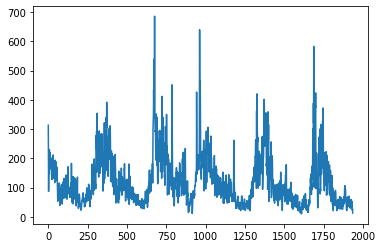

In [132]:
plt.plot(df.index,df["PM2.5"])

In [133]:
df.index=df.Date
df.drop(["Date"],axis=1,inplace=True)

# Pre-processing the data

In [134]:
df.isnull().any()

PM2.5    False
PM10      True
NO2      False
CO       False
SO2       True
O3        True
AQI       True
dtype: bool

In [135]:
df.corr()

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
PM2.5,1.000000,0.862293,0.676580,0.147834,0.370986,0.257441,0.882879
PM10,0.862293,1.000000,0.730968,0.125901,0.463736,0.313575,0.894762
NO2,0.676580,0.730968,1.000000,0.031467,0.620142,0.442302,0.711772
CO,0.147834,0.125901,0.031467,1.000000,-0.158231,-0.024851,0.250429
SO2,0.370986,0.463736,0.620142,-0.158231,1.000000,0.319656,0.416497
O3,0.257441,0.313575,0.442302,-0.024851,0.319656,1.000000,0.334578
AQI,0.882879,0.894762,0.711772,0.250429,0.416497,0.334578,1.000000


In [136]:
#Finding all the null indexes in PM 2.5 and their total no.

df["PM2.5"].fillna(-10, inplace = True)
sum=0
for i in range(1928):
    if df["PM2.5"][i]==-10:
        print(i)
        sum+=1
print(sum)

0


In [137]:
#Filling the null values for PM 2.5
#df["PM2.5"][954]=(df["PM2.5"][953]+df["PM2.5"][956])/2
#df["PM2.5"][955]=(df["PM2.5"][954]+df["PM2.5"][956])/2

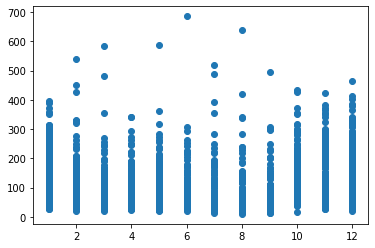

In [138]:
plt.scatter(df.index.month,df["PM2.5"])

In [139]:
df["PM2.5"]

Date
2015-01-01    313.22
2015-02-01    186.18
2015-03-01     87.18
2015-04-01    151.84
2015-05-01    146.60
               ...  
2020-03-07     37.00
2020-04-07     40.00
2020-05-07     23.00
2020-06-07     27.00
2020-07-07     13.00
Name: PM2.5, Length: 1934, dtype: float64

In [140]:
#Finding all the null indexes in PM 10 and their total no.

df["PM10"].fillna(-100, inplace = True)
sum=0
for i in range(1928):
    if df["PM10"][i]==-100:
        print(i)
        sum+=1
print(sum)

348
349
350
351
352
353
354
436
437
456
457
471
485
486
487
604
889
890
891
19


In [141]:
def replace(j):
    if df["PM10"][j]!=(-100):
        return df["PM10"][j]
    else:
        return replace(j+1)
        
df["PM10"].fillna(-100, inplace = True)

for i in range(1928):
    if df["PM10"][i]==-100:
        df["PM10"][i]=(replace(i+1)+df["PM10"][i-1])/2
    

In [142]:
#Finding all the null indexes in SO2 and their total no.

df["SO2"].fillna(-300, inplace = True)
sum=0
for i in range(1928):
    if df["SO2"][i]==-300:
        print(i)
        sum+=1
print(sum)

842
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
29


In [143]:
def replace(j):
    if df["SO2"][j]!=(-300):
        return df["SO2"][j]
    else:
        return replace(j+1)
        
df["SO2"].fillna(-300, inplace = True)

for i in range(1928):
    if df["SO2"][i]==-300:
        df["SO2"][i]=(replace(i+1)+df["SO2"][i-1])/2
    

In [144]:
#Finding all the null indexes in nO2 and their total no.

df["NO2"].fillna(-400, inplace = True)
sum=0
for i in range(1928):
    if df["NO2"][i]==-400:
        print(i)
        sum+=1
print(sum)

0


In [145]:
#Filling the null values for NO2
#df["NO2"][954]=(df["NO2"][953]+df["NO2"][956])/2
#df["NO2"][955]=(df["NO2"][954]+df["NO2"][956])/2

In [146]:
#Finding all the null indexes in nO2 and their total no.

df["O3"].fillna(-200, inplace = True)
sum=0
for i in range(1934):
    if df["O3"][i]==-200:
        print(i)
        sum+=1
print(sum)

842
890
891
3


In [147]:
#Filling the null values for O3
df["O3"][842]=(df["NO2"][841]+df["NO2"][843])/2
df["O3"][890]=(df["NO2"][889]+df["NO2"][892])/2
df["O3"][891]=(df["NO2"][889]+df["NO2"][892])/2

In [148]:
#Filling and finding AQI
#Finding all the null indexes in nO2 and their total no.

df["AQI"].fillna(-200, inplace = True)
sum=0
for i in range(1934):
    if df["AQI"][i]==-200:
        print(i)
        sum+=1
print(sum)

570
889
890
3


In [149]:
#Function to convert PM 2.5 to AQI
#Do keep in mind. It won't be exactly accurate

def PMAQI(Ci):
    if Ci>0 and Ci<=12:
        Ahi=50
        Alo=0
        Clo=0
        Chi=12
    elif Ci>12 and Ci<=35.4:
        Ahi=100
        Alo=51
        Clo=12.1
        Chi=35.4
    elif Ci>35.4 and Ci<=55.4:
        Ahi=150
        Alo=101
        Clo=35.5
        Chi=55.4
    elif Ci>55.4 and Ci<=150.4:
        Ahi=200
        Alo=151
        Clo=55.4
        Chi=150.4
    elif Ci>150.4 and Ci<=250.4:
        Ahi=300
        Alo=201
        Clo=150.5
        Chi=250.4
    elif Ci>250.4 and Ci<=350.4:
        Ahi=400
        Alo=301
        Clo=250.4
        Chi=350.4
    elif Ci>350.4 and Ci<=500.4:
        Ahi=500
        Alo=401
        Clo=350.4
        Chi=500.4
    elif Ci>500.4 and Ci<=999.4:
        Ahi=999
        Alo=501
        Clo=500.4
        Chi=999.4
    AQI=((Ahi-Alo)/(Chi-Clo))*(Ci-Clo)+Alo
    return AQI

df["AQI"][570]=PMAQI(df["PM2.5"][570])
df["AQI"][889]=PMAQI(df["PM2.5"][889])
df["AQI"][890]=PMAQI(df["PM2.5"][890])

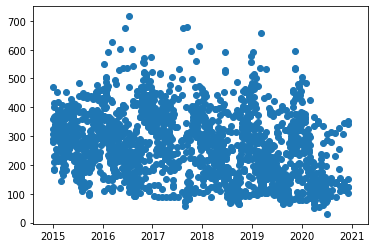

In [150]:
plt.scatter(df.index.date,df["AQI"])

# Building the VAR Model 

In [151]:
#Checking Stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen
t=df
coint_johansen(t,-1,1).eig

array([0.14839141, 0.12820228, 0.10143094, 0.06378737, 0.04588372,
       0.03197591, 0.00434379])

In [187]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [188]:
#Granger's Causality Test
from statsmodels.tsa.stattools import grangercausalitytests

granger_test=sm.tsa.stattools.grangercausalitytests(df, maxlag=2, verbose=True)
granger_test


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=43.1261 , p=0.0000  , df_denom=1925, df_num=1
ssr based chi2 test:   chi2=43.3053 , p=0.0000  , df=1
likelihood ratio test: chi2=42.8274 , p=0.0000  , df=1


ValueError: wrong shape for coefs

In [153]:
#Creating the validation and train set
train=df[:int(0.8*(len(df)))]
valid=df[int(0.8*(len(df))):]

In [192]:
#fitting the model
from statsmodels.tsa.vector_ar.var_model import VAR

model=VAR(endog=df)
model_fit=model.fit(maxlags=15,ic='aic')

C:\Users\Mayank\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [193]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 07, Jul, 2020
Time:                     23:00:20
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    34.9270
Nobs:                     1923.00    HQIC:                   33.9288
Log likelihood:          -50618.3    FPE:                3.04034e+14
AIC:                      33.3479    Det(Omega_mle):     2.30170e+14
--------------------------------------------------------------------
Results for equation PM2.5
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             1.247773         3.218019            0.388           0.698
L1.PM2.5          0.886981         0.039078           22.698           0.000
L1.PM10           0.084376         0.025057            3.367           0.001

In [194]:
#Making predictions on dataset
prediction=model_fit.forecast(model_fit.y,steps=11)

In [195]:
prediction

array([[ 17.5132201 ,  42.46484892,   6.925274  ,   0.49948563,
          8.12647216,  14.90127671,  48.12478824],
       [ 29.35989053,  73.96361499,  14.24684878,   0.4125011 ,
         10.56144967,  17.43590856,  71.0980797 ],
       [ 35.26473405,  98.81913644,  18.40983041,   0.8301977 ,
         10.09038706,  19.47726305,  92.88065878],
       [ 35.22062086,  99.38341926,  17.99912821,   0.99557042,
          9.77036437,  20.38599282,  98.39583777],
       [ 32.27379192,  93.15679815,  17.34289973,   0.80467661,
         10.09491051,  20.86873086, 100.40023466],
       [ 34.34472664,  92.95988947,  17.24522227,   0.72526368,
          9.9103394 ,  21.6390113 ,  99.91966645],
       [ 35.19819199,  95.03584269,  18.13266085,   0.89721457,
         10.33432192,  22.58095847, 100.91390167],
       [ 31.1572722 ,  90.65348634,  17.34294833,   0.90543759,
         10.25129553,  23.24199756, 101.71869251],
       [ 29.27803484,  85.71834719,  18.01027341,   0.90199677,
         10.3896

In [179]:
#Converting our prediction array to Dataframe
Prediction=pd.DataFrame(index=range(0,len(prediction)),columns=df.columns)

In [182]:
Prediction

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
0,17.5132,42.4648,6.92527,0.499486,8.12647,14.9013,48.1248
1,29.3599,73.9636,14.2468,0.412501,10.5614,17.4359,71.0981
2,35.2647,98.8191,18.4098,0.830198,10.0904,19.4773,92.8807
3,35.2206,99.3834,17.9991,0.99557,9.77036,20.386,98.3958
4,32.2738,93.1568,17.3429,0.804677,10.0949,20.8687,100.4
5,34.3447,92.9599,17.2452,0.725264,9.91034,21.639,99.9197
6,35.1982,95.0358,18.1327,0.897215,10.3343,22.581,100.914
7,31.1573,90.6535,17.3429,0.905438,10.2513,23.242,101.719
8,29.278,85.7183,18.0103,0.901997,10.3897,24.0283,98.449
9,30.1468,87.9192,18.7169,0.898824,10.2017,25.0113,99.2224


In [181]:
for j in range(7):
    for i in range(len(prediction)):
        Prediction.iloc[i][j]=prediction[i][j]

In [186]:
import joblib
joblib.dump(model_fit,'AQIVAR.pkl')

['AQIVAR.pkl']